In [82]:
# Import libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time 

conn = pyodbc.connect('Driver={ODBC Driver 13 for SQL Server};'
                      'Server=analytics.softone.gr;'
                      'Database=analytics;'
                      'UID=analytics;'
                       'PWD=idlyKQcUWP%6&$23tn;')


In [84]:
tic = time.clock()
yearly = pd.read_sql_query('SELECT *  FROM [ANALYTICS].[dbo].[06_Churn_YearlyData]', conn)


yearly = yearly[(yearly.BRANCH == 'ATHENS') | (yearly.BRANCH == 'SALONICA')]

yearly["date"] = pd.to_datetime(yearly["date"])
toc = time.clock()
toc - tic


5.415391100000001

In [42]:
# Create the dictionary
replace_map = {'BrandName' : {'Soft1 200':'Small', 'Soft1 100':'Small', 'MySoft1':'Small', 
                              'Soft1 300':'Medium', 'Soft1 ERP':'Large', 
                              'Soft1 Solutions':'Small'}}

# Replace values
yearly.replace(replace_map, inplace = True)

# yearly["BrandName"].value_counts()


In [87]:
# HISTORICAL CHURN ANALYSIS

yearly_all = (yearly
                  .assign(date = lambda x: (x['date'].dt.year))
                  .query("date >= 2005 & date < 2019")
                  .groupby('date')['churn'].mean()
             )

# yearly_all = pd.DataFrame(yearly_all)

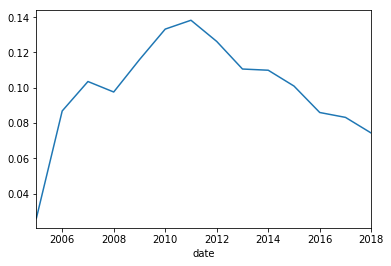

In [88]:
# Plot 
yearly_all.plot(x = 'date',
                y = 'churn',
                kind = 'line')



In [89]:
plt.Line2D(yearly_all.index, yearly_all['churn'], color = 'blue')
plt.grid(True)
plt.show()

KeyError: 'churn'

In [79]:
#yearly_all.head()
yearly_all['churn'].values

# yearly_all.groupby('date').size()


# yearly_all[['date', 'Annual_Contract', 'Annual_Contract2', 'Annual_Contract3']]

# yearly_all.dtypes

array([0.02631579, 0.08689459, 0.10356537, 0.09762805, 0.115949  ,
       0.13325031, 0.13826789, 0.12626352, 0.11064118, 0.10995818,
       0.10099432, 0.08601712, 0.08324808, 0.07436709])